Image shape: (256, 256, 13)


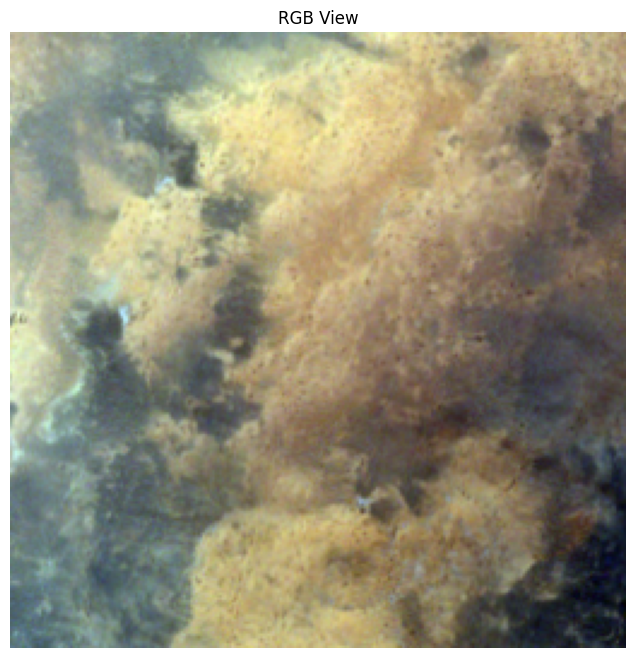

In [23]:
import tifffile
import matplotlib.pyplot as plt
import numpy as np

img = tifffile.imread('/home/saksham/Downloads/ROIs2017_winter_s2/ROIs2017_winter/s2_8/ROIs2017_winter_s2_8_p30.tif')
img2 = tifffile.imread('/home/saksham/Downloads/ROIs2017_winter_s1/ROIs2017_winter/s1_84/ROIs2017_winter_s1_84_p94.tif')
print("Image shape:", img.shape)

# If it's (H, W, Bands), select RGB bands
if img.ndim == 3 and img.shape[2] >= 4:
    # Sentinel-2 typical: B4 (Red), B3 (Green), B2 (Blue) at indices 3, 2, 1
    rgb = img[:, :, [3, 2, 1]]
    # Normalize each channel
    def normalize(channel):
        return (channel - np.min(channel)) / (np.max(channel) - np.min(channel) + 1e-6)
    rgb_normalized = np.stack([normalize(rgb[:, :, i]) for i in range(3)], axis=-1)
    plt.figure(figsize=(8, 8))
    plt.imshow(rgb_normalized)
    plt.axis('off')
    plt.title("RGB View")
    plt.show()
else:
    print("Image does not have enough bands for RGB visualization.")

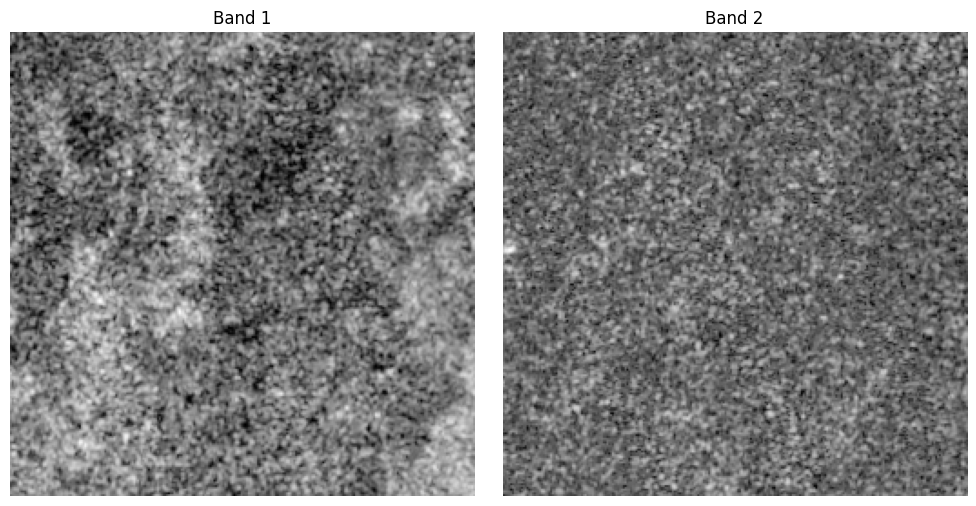

In [22]:
import tifffile
import matplotlib.pyplot as plt

img = tifffile.imread('/home/saksham/Downloads/ROIs2017_winter_s1/ROIs2017_winter/s1_8/ROIs2017_winter_s1_8_p30.tif')

# Show both bands
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img[:, :, 0], cmap='gray')
plt.title('Band 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img[:, :, 1], cmap='gray')
plt.title('Band 2')
plt.axis('off')

plt.tight_layout()
plt.show()


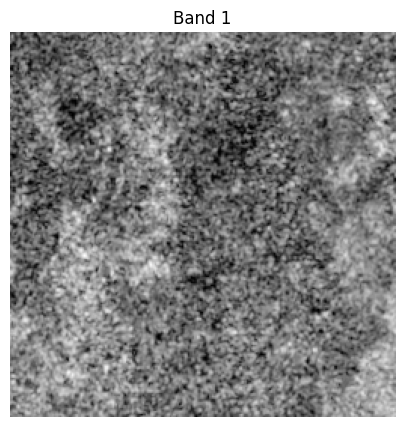

Image shape: (256, 256, 13)


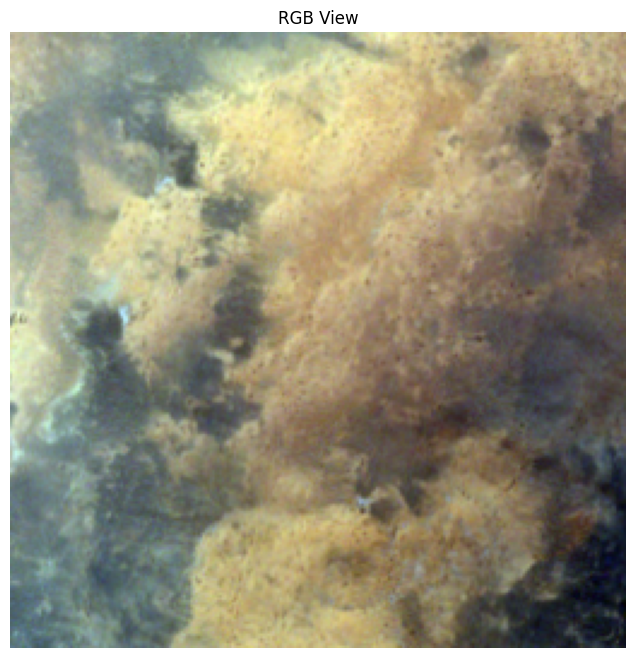

In [25]:
import tifffile
import matplotlib.pyplot as plt

img = tifffile.imread('/home/saksham/Downloads/ROIs2017_winter_s1/ROIs2017_winter/s1_8/ROIs2017_winter_s1_8_p30.tif')

# Show both bands
plt.figure(figsize=(10, 5))

plt.imshow(img[:, :, 0], cmap='gray')
plt.title('Band 1')
plt.axis('off')


plt.show()


import tifffile
import matplotlib.pyplot as plt
import numpy as np

imgo = tifffile.imread('/home/saksham/Downloads/ROIs2017_winter_s2/ROIs2017_winter/s2_8/ROIs2017_winter_s2_8_p30.tif')
img2 = tifffile.imread('/home/saksham/Downloads/ROIs2017_winter_s1/ROIs2017_winter/s1_84/ROIs2017_winter_s1_84_p94.tif')
print("Image shape:", imgo.shape)

# If it's (H, W, Bands), select RGB bands
if img.ndim == 3 and imgo.shape[2] >= 4:
    # Sentinel-2 typical: B4 (Red), B3 (Green), B2 (Blue) at indices 3, 2, 1
    rgb = imgo[:, :, [3, 2, 1]]
    # Normalize each channel
    def normalize(channel):
        return (channel - np.min(channel)) / (np.max(channel) - np.min(channel) + 1e-6)
    rgb_normalized = np.stack([normalize(rgb[:, :, i]) for i in range(3)], axis=-1)
    plt.figure(figsize=(8, 8))
    plt.imshow(rgb_normalized)
    plt.axis('off')
    plt.title("RGB View")
    plt.show()
else:
    print("Image does not have enough bands for RGB visualization.")


In [27]:
!pip install rasterio

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 18.0 MB/s eta 0:00:0000:0100:01


In [33]:
import os
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Path to your downloaded SEN12MS dataset (update this)
dataset_root = '/home/saksham/Documents/summer_school/SAR/SAR-EO-GAN/DATA/ROIs2017_winter_s2r/ROIs2017_winter'

def find_winter_s2_files(root_dir):
    winter_s2_files = []
    for dirpath, dirnames, filenames in os.walk(root_dir):
        for file in filenames:
            if file.endswith('.tif'):
                winter_s2_files.append(os.path.join(dirpath, file))
    return winter_s2_files


# Load and display a sample as RGB
def display_rgb(file_path):
    with rasterio.open(file_path) as src:
        # Sentinel-2 bands: 4 (Red), 3 (Green), 2 (Blue) for RGB
        red = src.read(4)
        green = src.read(3)
        blue = src.read(2)
        
        # Stack bands and normalize for display (stretch to 0-255)
        rgb = np.dstack((red, green, blue))
        rgb = np.clip((rgb / np.max(rgb)) * 255, 0, 255).astype(np.uint8)
        
        # Display
        plt.figure(figsize=(8, 8))
        plt.imshow(rgb)
        plt.title(f'RGB View of {os.path.basename(file_path)}')
        plt.axis('off')
        plt.show()

# Main execution
winter_files = find_winter_s2_files(dataset_root)
if not winter_files:
    print("No winter Sentinel-2 files found. Ensure dataset is downloaded correctly.")
else:
    print(f"Found {len(winter_files)} winter Sentinel-2 files.")
    # Display the first one as example
    display_rgb(winter_files[0])


No winter Sentinel-2 files found. Ensure dataset is downloaded correctly.
